# **E-commerce**

DESCRIPTION

<b>Problem Statement</b>

*   Amazon is an online shopping website that now caters to millions of people everywhere. Over 4,000 consumer reviews for Amazon brand products like Kindle, Fire TV Stick and more are provided. 
*   The dataset has attributes like brand, categories, primary categories, reviews.title, reviews.text, and the sentiment. Sentiment is a categorical variable with three levels "Positive", "Negative“, and "Neutral". For a given unseen data, the sentiment needs to be predicted.
*   You are required to predict Sentiment or Satisfaction of a purchase based on multiple features and review text.

<b>Dataset Snapshot</b>

![picture](https://drive.google.com/uc?id=1h1pQG5ZlYAGS-lPncZUalh-duXfO1qsA)

**Project Task: Week 1**

**Class Imbalance Problem:**

1. Perform an EDA on the dataset.

  a)  See what a positive, negative, and neutral review looks like

  b)  Check the class count for each class. It’s a class imbalance problem.

2. Convert the reviews in Tf-Idf score.

3. Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.

**Project Task: Week 2**

**Tackling Class Imbalance Problem:**

1. Oversampling or undersampling can be used to tackle the class imbalance problem. 
2. In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this      project.
3. Use Tree-based classifiers like Random Forest and XGBoost.

**Note:** Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter which takes care of the imbalanced class.

**Project Task: Week 3**

**Model Selection:**

1. Apply multi-class SVM’s and neural nets.
2. Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.
3. Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements. Draw insights on the same.

**Project Task: Week 4**

**Applying LSTM:**

1. Use LSTM for the previous problem (use parameters of LSTM like top-word, embedding-length, Dropout, epochs, number of layers, etc.)

  **Hint:** Another variation of LSTM, GRU (Gated Recurrent Units) can be tried as well.

2. Compare the accuracy of neural nets with traditional ML based algorithms.

3. Find the best setting of LSTM (Neural Net) and GRU that can best classify the reviews as positive, negative, and neutral. 

  **Hint:** Use techniques like Grid Search, Cross-Validation and Random Search

**Optional Tasks: Week 4**

**Topic Modeling:**

1. Cluster similar reviews.

  **Note:** Some reviews may talk about the device as a gift-option. Other reviews may be about product looks and some may highlight about its battery and performance. Try naming the clusters.
2. Perform Topic Modeling

  **Hint:** Use scikit-learn provided Latent Dirchlette Allocation (LDA) and Non-Negative Matrix Factorization (NMF).

### **Project Task: Week 1**

**Class Imbalance Problem:**

In [1]:
# IMPORT FILES FROM DRIVE INTO GOOGLE-COLAB:

# STEP-1: Import Libraries

# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials     

In [2]:
# STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1-4wqB95mnb38zuH6LraVRWF5aRaHvRAP'})
downloaded.GetContentFile('train_data.csv') 

downloaded2 = drive.CreateFile({'id':'1fIXlMy92BLh9xIFSXgD_BQ5o2V9hmet4'}) 
downloaded2.GetContentFile('test_data.csv') 

downloaded3 = drive.CreateFile({'id':'1zES4t3-vlm69tqE96JrSay5IA0UDA4Pz'}) 
downloaded3.GetContentFile('test_data_hidden.csv') 

In [6]:
# importing the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

In [80]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet

from bs4 import BeautifulSoup  
import re

from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer


In [8]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.metrics import recall_score, precision_score

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [10]:
data = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
test_prediction = pd.read_csv('test_data_hidden.csv')

In [11]:
data.head(3)

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral


In [12]:
print("      Train data shape: ",data.shape)
print("       Test data shape: ",test.shape)
print("Test data hidden shape: ",test_prediction.shape)

      Train data shape:  (4000, 8)
       Test data shape:  (1000, 7)
Test data hidden shape:  (1000, 8)


In [13]:
data.isnull().sum()

name                  0
brand                 0
categories            0
primaryCategories     0
reviews.date          0
reviews.text          0
reviews.title        10
sentiment             0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               4000 non-null   object
 1   brand              4000 non-null   object
 2   categories         4000 non-null   object
 3   primaryCategories  4000 non-null   object
 4   reviews.date       4000 non-null   object
 5   reviews.text       4000 non-null   object
 6   reviews.title      3990 non-null   object
 7   sentiment          4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


1. Perform an EDA on the dataset.

  a)  See what a positive, negative, and neutral review looks like

  b)  Check the class count for each class. It’s a class imbalance problem.

In [15]:
data['sentiment'].value_counts()

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


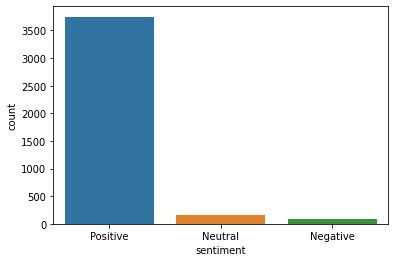

In [16]:
sns.countplot( data['sentiment'])

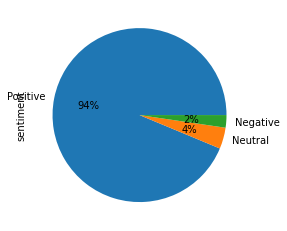

In [17]:
data['sentiment'].value_counts().plot(kind='pie', autopct= '%1.0f%%')

From above charts we can see that the number of postive reviews is much higher then the number of negative and neutral reviews. This is a class imbalance problem. 

2. Convert the reviews in Tf-Idf score.

In [18]:
data.columns

Index(['name', 'brand', 'categories', 'primaryCategories', 'reviews.date',
       'reviews.text', 'reviews.title', 'sentiment'],
      dtype='object')

In [19]:
data1 = data [["sentiment","reviews.text"]]

In [20]:
X_train = data1["reviews.text"]
y_train = data1["sentiment"]

X_test = test["reviews.text"]
y_test = test_prediction["sentiment"]

In [21]:
from nltk.corpus import stopwords
nltk.download('wordnet')
#Download Stopwords
nltk.download('stopwords')

def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword        
        stops = set(stopwords.words('english'))
        
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]

    if split_text==True:  # split text
        return (words)
            
    return( " ".join(words))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
# Preprocess text data in training set and validation set
X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d, remove_stopwords=True, stemming=True))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 got tablet replac son old one love adult child profil abil year replac warranti case also came handi mani time


In [23]:
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(tfidf.get_feature_names()))
print("Show some feature names : \n", tfidf.get_feature_names()[::10])

Number of features : 3196 

Show some feature names : 
 ['abc', 'access', 'acoust', 'adapt', 'ador', 'afternoon', 'ai', 'album', 'allow', 'alreadi', 'ambienc', 'angel', 'anybodi', 'appar', 'approach', 'arm', 'asid', 'astound', 'audio', 'auxiliari', 'awesom', 'back', 'baggi', 'barn', 'bath', 'bday', 'bedroom', 'behind', 'besid', 'big', 'blackscreen', 'block', 'bog', 'boom', 'bottom', 'brand', 'bright', 'brown', 'bug', 'bunch', 'byod', 'came', 'captabl', 'carryeasi', 'caus', 'certainti', 'charger', 'childproof', 'chosen', 'citi', 'cleaner', 'closer', 'coexist', 'comand', 'common', 'competit', 'compromis', 'confer', 'connoisseur', 'consumpt', 'conveni', 'coolidg', 'count', 'cover', 'cream', 'criteria', 'cup', 'daddi', 'date', 'deal', 'dedic', 'delet', 'demonstr', 'despis', 'develop', 'difficult', 'dinner', 'disconnect', 'displaynic', 'dmv', 'dolbi', 'doubt', 'drain', 'driveway', 'dubbl', 'ear', 'easter', 'econom', 'effort', 'elexa', 'emphasi', 'engag', 'enthusiasm', 'eras', 'eve', 'everyo

3. Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.

In [24]:
# Train MultinomialNB classifier
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
# predicated values
predictions = mnb.predict(tfidf.transform(X_test_cleaned))

In [26]:
print("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))    
print("\nF1 score : {:.4f}".format(f1_score(y_test, predictions, average='weighted')))
print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))


Accuracy on validation set: 0.9370

F1 score : 0.9065

Classification report : 
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        24
     Neutral       0.00      0.00      0.00        39
    Positive       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000


Confusion Matrix : 
 [[  0   0  24]
 [  0   0  39]
 [  0   0 937]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)

  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)

In [28]:
print("ROC_AUC_score : ",multiclass_roc_auc_score(y_test, predictions))

ROC_AUC_score :  0.5


In [29]:
np.unique(y_test, return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([ 24,  39, 937]))

In [30]:
np.unique(predictions, return_counts=True)

(array(['Positive'], dtype='<U8'), array([1000]))

In [31]:
print("Predicted values : ", set(predictions))

Predicted values :  {'Positive'}


Here all the reviews are predicted as postive.

### **Project Task: Week 2**

**Tackling Class Imbalance Problem:**

1. Oversampling or undersampling can be used to tackle the class imbalance problem. 
2. In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this      project.
3. Use Tree-based classifiers like Random Forest and XGBoost.

  **Note:** Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter which takes care of the imbalanced class.

In [32]:
#Creating independent and Dependent Features
columns = data1.columns.tolist()
# Filtering the columns to remove data we do not want 
columns = [c for c in columns if c not in ["sentiment"]]
# Store the variable we are predicting 
target = "sentiment"
# Defining a random state 
state = np.random.RandomState(11)
X = data1[columns]
Y = data1[target]
# Printing the shapes of X & Y
print(X.shape)
print(Y.shape)

(4000, 1)
(4000,)


In [33]:
print(data1.sentiment.value_counts())

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


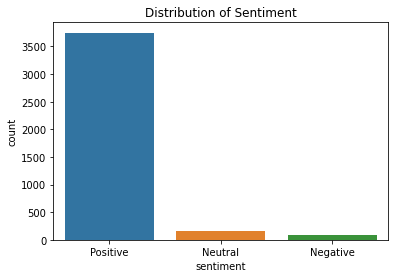

In [34]:
plt.title("Distribution of Sentiment")
sns.countplot(Y)

In [35]:
# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0) 
X_res,Y_res=ros.fit_sample(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [36]:
from collections import Counter
print(sorted(Counter(Y_res).items()))

[('Negative', 3749), ('Neutral', 3749), ('Positive', 3749)]


In [37]:
#Checking out both old & new data
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_res)))

Original dataset shape Counter({'Positive': 3749, 'Neutral': 158, 'Negative': 93})
Resampled dataset shape Counter({'Positive': 3749, 'Neutral': 3749, 'Negative': 3749})


In [38]:
#Creating X output to dataframe
X1=pd.DataFrame(X_res,columns=['Processed_Review'])

In [39]:
#Creating Y output to dataframe for merging
Y1=pd.DataFrame(Y_res,columns=['sentiment'])

In [40]:
#Merging the X & Y output to Final data
Final_data=pd.concat([X1,Y1],axis=1)
Final_data.head(3)

,Processed_Review,sentiment
0,Purchased on Black FridayPros - Great Price (e...,Positive
1,I purchased two Amazon in Echo Plus and two do...,Positive
2,Just an average Alexa option. Does show a few ...,Neutral


In [41]:
print(Final_data.sentiment.value_counts())

Negative    3749
Neutral     3749
Positive    3749
Name: sentiment, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


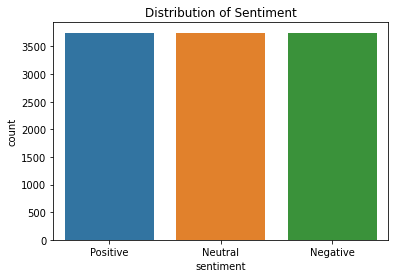

In [42]:
# Distribution of Sentiment after oversampling
plt.title("Distribution of Sentiment")
sns.countplot(Final_data.sentiment)

In [43]:
Final_data.head(3)

,Processed_Review,sentiment
0,Purchased on Black FridayPros - Great Price (e...,Positive
1,I purchased two Amazon in Echo Plus and two do...,Positive
2,Just an average Alexa option. Does show a few ...,Neutral


In [44]:
# Splitting data into training and test set

X_train = Final_data["Processed_Review"]
y_train = Final_data["sentiment"]

print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)

print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

print('%d training data and %d test data. \n' %(X_train.shape[0],X_test.shape[0]))

X_train shape (11247,)
y_train shape (11247,)
X_test shape (1000,)
y_test shape (1000,)
11247 training data and 1000 test data. 



In [45]:
#In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, 
#recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this project.

def modelEvaluation(predictions):    
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nF1 score : {:.4f}".format(f1_score(y_test, predictions, average='weighted')))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))
    print("\nROC_AUC_score : ",multiclass_roc_auc_score(y_test, predictions)) #multiclass_roc_auc_score() function develop above

In [46]:
# Preprocess text data in training set and validation set
X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d, remove_stopwords=True, stemming=True))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 got tablet replac son old one love adult child profil abil year replac warranti case also came handi mani time


In [47]:
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(tfidf.get_feature_names()))
print("Show some feature names : \n", tfidf.get_feature_names()[::10])

Number of features : 3196 

Show some feature names : 
 ['abc', 'access', 'acoust', 'adapt', 'ador', 'afternoon', 'ai', 'album', 'allow', 'alreadi', 'ambienc', 'angel', 'anybodi', 'appar', 'approach', 'arm', 'asid', 'astound', 'audio', 'auxiliari', 'awesom', 'back', 'baggi', 'barn', 'bath', 'bday', 'bedroom', 'behind', 'besid', 'big', 'blackscreen', 'block', 'bog', 'boom', 'bottom', 'brand', 'bright', 'brown', 'bug', 'bunch', 'byod', 'came', 'captabl', 'carryeasi', 'caus', 'certainti', 'charger', 'childproof', 'chosen', 'citi', 'cleaner', 'closer', 'coexist', 'comand', 'common', 'competit', 'compromis', 'confer', 'connoisseur', 'consumpt', 'conveni', 'coolidg', 'count', 'cover', 'cream', 'criteria', 'cup', 'daddi', 'date', 'deal', 'dedic', 'delet', 'demonstr', 'despis', 'develop', 'difficult', 'dinner', 'disconnect', 'displaynic', 'dmv', 'dolbi', 'doubt', 'drain', 'driveway', 'dubbl', 'ear', 'easter', 'econom', 'effort', 'elexa', 'emphasi', 'engag', 'enthusiasm', 'eras', 'eve', 'everyo

In [48]:
# Train MultinomialNB classifier
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
# predicated values
predictions = mnb.predict(tfidf.transform(X_test_cleaned))

In [50]:
modelEvaluation(predictions)


Accuracy on validation set: 0.8260

F1 score : 0.8654

Classification report : 
               precision    recall  f1-score   support

    Negative       0.21      0.46      0.29        24
     Neutral       0.14      0.46      0.22        39
    Positive       0.97      0.85      0.91       937

    accuracy                           0.83      1000
   macro avg       0.44      0.59      0.47      1000
weighted avg       0.92      0.83      0.87      1000


Confusion Matrix : 
 [[ 11   6   7]
 [  5  18  16]
 [ 37 103 797]]

ROC_AUC_score :  0.7081538509100146


In [51]:
np.unique(predictions, return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype='<U8'),
 array([ 53, 127, 820]))

In [52]:
print("Predicted values : ", set(predictions))

Predicted values :  {'Positive', 'Neutral', 'Negative'}


Because of oversampling, model has also predicted the Negative and Neutral santiment of the test data records.

In [53]:
# Use Tree-based classifiers like Random Forest and XGBoost.

# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
# Evaluating on the test set
predictions = rf.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.9470

F1 score : 0.9282

Classification report : 
               precision    recall  f1-score   support

    Negative       1.00      0.08      0.15        24
     Neutral       1.00      0.21      0.34        39
    Positive       0.95      1.00      0.97       937

    accuracy                           0.95      1000
   macro avg       0.98      0.43      0.49      1000
weighted avg       0.95      0.95      0.93      1000


Confusion Matrix : 
 [[  2   0  22]
 [  0   8  31]
 [  0   0 937]]

ROC_AUC_score :  0.5745319495319495


In [55]:
# XGBoost Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [56]:
# Evaluating on the test set
predictions = xgb.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.6600

F1 score : 0.7549

Classification report : 
               precision    recall  f1-score   support

    Negative       0.10      0.25      0.14        24
     Neutral       0.08      0.56      0.13        39
    Positive       0.97      0.67      0.80       937

    accuracy                           0.66      1000
   macro avg       0.38      0.50      0.36      1000
weighted avg       0.92      0.66      0.75      1000


Confusion Matrix : 
 [[  6  14   4]
 [  3  22  14]
 [ 53 252 632]]

ROC_AUC_score :  0.6447848811619922


### **Project Task: Week 3 & 4**

In [57]:
#Apply multi-class SVM’s
from sklearn import svm

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train_tfidf, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
# Evaluating on the test set
predictions = clf.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.9470

F1 score : 0.9282

Classification report : 
               precision    recall  f1-score   support

    Negative       1.00      0.08      0.15        24
     Neutral       1.00      0.21      0.34        39
    Positive       0.95      1.00      0.97       937

    accuracy                           0.95      1000
   macro avg       0.98      0.43      0.49      1000
weighted avg       0.95      0.95      0.93      1000


Confusion Matrix : 
 [[  2   0  22]
 [  0   8  31]
 [  0   0 937]]

ROC_AUC_score :  0.5745319495319495


In [58]:
# Apply neural nets



In [59]:
# 2.Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.

xgb_cmb = XGBClassifier()
mnb_cmb = MultinomialNB()

from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('xgb', xgb_cmb), ('mnb', mnb_cmb)])

In [60]:
eclf = eclf.fit(X_train_tfidf, y_train)

In [61]:
# Evaluating on the test set
predictions = eclf.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.6120

F1 score : 0.7184

Classification report : 
               precision    recall  f1-score   support

    Negative       0.12      0.50      0.19        24
     Neutral       0.07      0.56      0.13        39
    Positive       0.98      0.62      0.76       937

    accuracy                           0.61      1000
   macro avg       0.39      0.56      0.36      1000
weighted avg       0.92      0.61      0.72      1000


Confusion Matrix : 
 [[ 12   9   3]
 [  7  22  10]
 [ 83 276 578]]

ROC_AUC_score :  0.6809727487617184


**Word2Vec**

In [66]:
# Parsing Review into Sentences
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [67]:
# Splitting review text into parsed sentences using NLTK's punkt tokenizer

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences


# Parsing each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer)
    
print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[10])

11247 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['got', 'tablet', 'replac', 'son', 'old', 'one', 'love', 'adult', 'child', 'profil', 'abil', 'year', 'replac', 'warranti', 'case', 'also', 'came', 'handi', 'mani', 'time']


Creating Vocabulary List using Word2Vec Model

In [70]:
# Fitting parsed sentences to Word2Vec model 

num_features = 300  #embedding dimension                     
min_word_count = 10                
num_workers = 4       
context = 10                                                                                          
downsampling = 1e-3 

print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count,\
                 window = context, sample = downsampling)
w2v.init_sims(replace=True)
w2v.save("w2v_300features_10minwordcounts_10context") #save trained word2vec model

print("Number of words in the vocabulary list : %d \n" %len(w2v.wv.index2word)) #4016 
print("Show first 10 words in the vocabulary list  vocabulary list: \n", w2v.wv.index2word[0:10])

Training Word2Vec model ...

Number of words in the vocabulary list : 1248 

Show first 10 words in the vocabulary list  vocabulary list: 
 ['use', 'tablet', 'amazon', 'great', 'work', 'one', 'bought', 'good', 'kindl', 'app']


Averaging Feature Vectors

In [71]:
# Transfroming the training data into feature vectors

def makeFeatureVec(review, model, num_features):
    '''
    Transform a review to a feature vector by averaging feature vectors of words 
    appeared in that review and in the vocabulary list created
    '''
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    index2word_set = set(model.wv.index2word) #index2word is the vocabulary list of the Word2Vec model
    isZeroVec = True
    for word in review:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model[word])
            isZeroVec = False
    if isZeroVec == False:
        featureVec = np.divide(featureVec, nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    '''
    Transform all reviews to feature vectors using makeFeatureVec()
    '''
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model,num_features)
        counter = counter + 1
    return reviewFeatureVecs

In [72]:
# Getting feature vectors for training set
X_train_cleaned = []
for review in X_train:
    X_train_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
trainVector = getAvgFeatureVecs(X_train_cleaned, w2v, num_features)
print("Training set : %d feature vectors with %d dimensions" %trainVector.shape)


# Getting feature vectors for validation set
X_test_cleaned = []
for review in X_test:
    X_test_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
testVector = getAvgFeatureVecs(X_test_cleaned, w2v, num_features)
print("Validation set : %d feature vectors with %d dimensions" %testVector.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


Training set : 11247 feature vectors with 300 dimensions
Validation set : 1000 feature vectors with 300 dimensions


In [73]:
# Getting feature vectors for training set
trainVector = getAvgFeatureVecs(X_train, w2v, num_features)
print("Training set : %d feature vectors with %d dimensions" %trainVector.shape)

# Getting feature vectors for validation set
testVector = getAvgFeatureVecs(X_test, w2v, num_features)
print("Validation set : %d feature vectors with %d dimensions" %testVector.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


Training set : 11247 feature vectors with 300 dimensions
Validation set : 1000 feature vectors with 300 dimensions


Random Forest Classifer

In [74]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(trainVector, y_train)
predictions = rf.predict(testVector)
modelEvaluation(predictions)


Accuracy on validation set: 0.9310

F1 score : 0.9241

Classification report : 
               precision    recall  f1-score   support

    Negative       0.70      0.29      0.41        24
     Neutral       0.33      0.26      0.29        39
    Positive       0.95      0.98      0.96       937

    accuracy                           0.93      1000
   macro avg       0.66      0.51      0.56      1000
weighted avg       0.92      0.93      0.92      1000


Confusion Matrix : 
 [[  7   0  17]
 [  0  10  29]
 [  3  20 914]]

ROC_AUC_score :  0.6282477238566638


**Applying LSTM**

LSTM(Long Short Term Memory) is special kind of recurrent neural network that is capable of learning long term dependencies in data.

**Simple LSTM**

First we preprocess the text data to 2D tensor before we begin fitting it into a simple LSTM.



In [93]:
# Convert the sentiments

y_train.replace(('Positive','Negative','Neutral'),(1,0,2), inplace=True)
y_test.replace(('Positive','Negative','Neutral'),(1,0,2), inplace=True)

In [104]:
#import
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

In [95]:
top_words = 20000 
maxlen = 100 
batch_size = 32
nb_classes = 3
nb_epoch = 3


# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words)
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)


# One-Hot Encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape) 
print('X_test shape:', X_test_seq.shape) 
print('y_train shape:', y_train_seq.shape) 
print('y_test shape:', y_test_seq.shape) 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


X_train shape: (11247, 100)
X_test shape: (1000, 100)
y_train shape: (11247, 3)
y_test shape: (1000, 3)


In [106]:
# Constructing a Simple LSTM
model1 = Sequential()
model1.add(Embedding(top_words, 128))
model1.add(Dropout(0.2))
model1.add(LSTM(128)) 
model1.add(Dense(nb_classes))
model1.add(Activation('softmax'))
model1.summary()

# Compiling LSTM
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model1.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_epoch, verbose=1)

# Model Evaluation
score = model1.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 2,691,971
Trainable params: 2,691,971
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
352/352 [==============================] - 56s 153ms/step - loss: 0.4176 - accuracy: 0.6820
Epoch 2/

**LSTM with Word2Vec Embedding**

In [108]:
# Loading pretrained Word2Vec model
w2v = Word2Vec.load("w2v_300features_10minwordcounts_10context")


# Getting Word2Vec embedding matrix
embedding_matrix = w2v.wv.syn0  # embedding matrix, type = numpy.ndarray 
print("Shape of embedding matrix : ", embedding_matrix.shape) #(vocabulary size, embedding dimension)
# w2v.wv.syn0[0] #feature vector of the first word in the vocabulary list

Shape of embedding matrix :  (1248, 300)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


In [109]:
top_words = embedding_matrix.shape[0] 
maxlen = 100 
batch_size = 32
nb_classes = 3
nb_epoch = 3


# Vectorizing X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) 
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)


# One-Hot Encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape) 
print('X_test shape:', X_test_seq.shape) 
print('y_train shape:', y_train_seq.shape) 
print('y_test shape:', y_test_seq.shape) 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


X_train shape: (11247, 100)
X_test shape: (1000, 100)
y_train shape: (11247, 3)
y_test shape: (1000, 3)


In [110]:
# Constructing Word2Vec embedding layer
embedding_layer = Embedding(embedding_matrix.shape[0], 
                            embedding_matrix.shape[1], 
                            weights=[embedding_matrix])


# Constructing LSTM with Word2Vec embedding
model2 = Sequential()
model2.add(embedding_layer)
model2.add(Dropout(0.1))
model2.add(LSTM(128))
model2.add(Dense(nb_classes))
model2.add(Activation('softmax'))
model2.summary()

# Compiling model
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 300)         374400    
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 300)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 594,435
Trainable params: 594,435
Non-trainable params: 0
_________________________________________________________________


In [111]:
history = model2.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_epoch,validation_data=(X_test_seq, y_test_seq), verbose=1)


# Model evaluation
score = model2.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Epoch 1/3
352/352 [==============================] - 86s 239ms/step - loss: 0.3819 - accuracy: 0.7089 - val_loss: 0.1747 - val_accuracy: 0.9270
Epoch 2/3
352/352 [==============================] - 86s 244ms/step - loss: 0.0408 - accuracy: 0.9836 - val_loss: 0.2870 - val_accuracy: 0.8710
Epoch 3/3
32/32 [==============================] - 2s 61ms/step - loss: 0.3114 - accuracy: 0.8610
Test loss : 0.3114
Test accuracy : 0.8610


### **Optional Tasks: Week 4**

**Topic Modeling:**

Latent Dirichlet Allocation(LDA)

In [113]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#Download Stopwords
nltk.download('stopwords')

wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[a-z]+')
stop_words = set(stopwords.words('english'))

def preprocess(document):
    document = document.lower() # Convert to lowercase
    words = tokenizer.tokenize(document) # Tokenize
    words = [w for w in words if not w in stop_words] # Removing stopwords
    # Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [wordnet_lemmatizer.lemmatize(x, pos) for x in words]
    return " ".join(words)

print("Setup Complete")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Setup Complete


In [114]:
data1.head()

,sentiment,reviews.text
0,Positive,Purchased on Black FridayPros - Great Price (e...
1,Positive,I purchased two Amazon in Echo Plus and two do...
2,Neutral,Just an average Alexa option. Does show a few ...
3,Positive,"very good product. Exactly what I wanted, and ..."
4,Positive,This is the 3rd one I've purchased. I've bough...


In [115]:
data_lda = data1
data_lda.head()

,sentiment,reviews.text
0,Positive,Purchased on Black FridayPros - Great Price (e...
1,Positive,I purchased two Amazon in Echo Plus and two do...
2,Neutral,Just an average Alexa option. Does show a few ...
3,Positive,"very good product. Exactly what I wanted, and ..."
4,Positive,This is the 3rd one I've purchased. I've bough...


In [116]:
data_lda['Processed_Review'] = data_lda['reviews.text'].apply(preprocess)

data_lda.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sentiment,reviews.text,Processed_Review
0,Positive,Purchased on Black FridayPros - Great Price (e...,purchase black fridaypros great price even sal...
1,Positive,I purchased two Amazon in Echo Plus and two do...,purchase two amazon echo plus two dot plus fou...
2,Neutral,Just an average Alexa option. Does show a few ...,average alexa option show thing screen still l...
3,Positive,"very good product. Exactly what I wanted, and ...",good product exactly want good price
4,Positive,This is the 3rd one I've purchased. I've bough...,rd one purchase buy one niece case compare one...


In [117]:
data_lda1 = data_lda[["sentiment","Processed_Review"]]
data_lda1.head()

,sentiment,Processed_Review
0,Positive,purchase black fridaypros great price even sal...
1,Positive,purchase two amazon echo plus two dot plus fou...
2,Neutral,average alexa option show thing screen still l...
3,Positive,good product exactly want good price
4,Positive,rd one purchase buy one niece case compare one...


In [118]:
import nltk
nltk.download('wordnet')

doc_complete = data_lda1["Processed_Review"].tolist()
doc_clean = [cleanText(doc).split() for doc in doc_complete]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [125]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel

In [120]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary(3415 unique tokens: ['able', 'access', 'accomplish', 'ad', 'add']...)


In [121]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 3),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 1)],
 [(6, 1),
  (26, 2),
  (34, 1),
  (35, 4),
  (36, 1),
  (37, 2),
  (38, 1),
  (39, 1),
  (40, 2),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 2),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1)],
 [(35, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 

In [124]:
NUM_TOPICS = 9
ldamodel = LdaModel(doc_term_matrix, num_topics=NUM_TOPICS, id2word=dictionary, passes=30)

In [126]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.042*"battery" + 0.031*"life" + 0.019*"long" + 0.018*"light" + 0.015*"like" + 0.015*"read" + 0.012*"last" + 0.012*"really" + 0.011*"good" + 0.011*"easy"')

(1, '0.028*"screen" + 0.027*"amazon" + 0.026*"good" + 0.020*"nice" + 0.016*"show" + 0.016*"echo" + 0.014*"use" + 0.012*"device" + 0.011*"picture" + 0.011*"prime"')

(2, '0.066*"kid" + 0.037*"tablet" + 0.031*"great" + 0.028*"easy" + 0.027*"use" + 0.020*"love" + 0.020*"set" + 0.018*"apps" + 0.018*"child" + 0.014*"lot"')

(3, '0.051*"tablet" + 0.026*"buy" + 0.019*"one" + 0.019*"game" + 0.018*"use" + 0.017*"play" + 0.015*"get" + 0.015*"read" + 0.013*"purchase" + 0.012*"need"')

(4, '0.024*"charge" + 0.019*"kindle" + 0.017*"day" + 0.016*"buy" + 0.016*"case" + 0.015*"time" + 0.014*"come" + 0.014*"get" + 0.013*"read" + 0.012*"drop"')

(5, '0.081*"love" + 0.044*"buy" + 0.034*"old" + 0.032*"kindle" + 0.029*"use" + 0.029*"one" + 0.026*"year" + 0.023*"purchase" + 0.022*"fire" + 0.022*"gift"')

(6, '0.060*"great" + 0.053*"tablet" + 0.051*

In [127]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v', topn=NUM_TOPICS)
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.5268909410635483


In [128]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model_topic_an = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model_topic_an)
        coherencemodel = CoherenceModel(model=model_topic_an, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [129]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=doc_clean, start=2, limit=50, step=1)

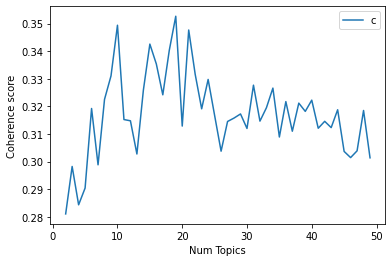

In [130]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [131]:
word_dict = {}
for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 10)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [132]:
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8
0,battery,screen,kid,tablet,charge,love,great,book,echo
1,life,amazon,tablet,buy,kindle,buy,tablet,read,alexa
2,long,good,great,one,day,old,good,kindle,great
3,light,nice,easy,game,buy,kindle,price,easy,music
4,like,show,use,use,case,use,work,light,love
5,read,echo,love,play,time,one,recommend,love,show
6,last,use,set,get,come,year,product,use,use
7,really,device,apps,read,get,purchase,would,device,home
8,good,picture,child,purchase,read,fire,amazon,take,sound
9,easy,prime,lot,need,drop,gift,well,great,amazon


In [133]:
ldamodel.show_topic(0, topn = 10)

[('battery', 0.04201553),
 ('life', 0.031147625),
 ('long', 0.018773856),
 ('light', 0.017651163),
 ('like', 0.015021572),
 ('read', 0.014722267),
 ('last', 0.012318572),
 ('really', 0.011982151),
 ('good', 0.010957529),
 ('easy', 0.010801834)]

In [134]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 5.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=31d06a025bdef6d7f7fba415dc15124b6331566255322bed304fc2e41ccf14fc
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [135]:
import pyLDAvis.gensim

Lda_display = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False)
pyLDAvis.display(Lda_display)